## Gather

In [1]:
import pandas as pd
import requests
import tweepy
import json
import numpy as np
import os

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#buscando o arquivo
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

#armazenando o arquivo
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)
response

<Response [200]>

In [3]:
image_predictions = pd.read_csv('image-predictions.tsv',sep = '\t')

## Assess

In [15]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [404]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
twitter_archive['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Daisy          7
Buddy          7
Toby           7
Bailey         7
Koda           6
Bella          6
Milo           6
Leo            6
Dave           6
Oscar          6
Stanley        6
Scout          6
Jax            6
Rusty          6
Jack           6
George         5
            ... 
Zuzu           1
Grizzwald      1
Chaz           1
Harry          1
Maya           1
Tuck           1
Furzey         1
Glenn          1
Cal            1
Siba           1
William        1
Divine         1
Brooks         1
Rose           1
Dudley         1
Tess           1
Kaiya          1
Millie         1
Margo          1
Pherb          1
Dug            1
Charl          1
Alfy           1
Brady          1
Sully          1
Ronduh         1
Scruffers      1
Wishes        

In [24]:
twitter_archive[twitter_archive['retweeted_status_id'].isnull()].count()

tweet_id                      2175
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2175
source                        2175
text                          2175
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                 2117
rating_numerator              2175
rating_denominator            2175
name                          2175
doggo                         2175
floofer                       2175
pupper                        2175
puppo                         2175
dtype: int64

In [30]:
twitter_archive[twitter_archive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [29]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Clean

In [4]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()

#### Qualidade
##### `twitter_archive` table
- Existem dados de retweet na tabela (o projeto pede que não seja usado esse tipo de dados) 
- Existem tweets sem imagens (o projeto pede que não seja usado esse tipo de dados) 
- -----------------------------------------------------------------------------------------
- Valor errado na coluna rating_denominator ID 666287406224695296 
- Valor errado na coluna rating_numerator ID 666287406224695296 
- Erro no tipo de data (Dogtionary,datestamp,tweet_id) 
- Nome errado no ID 667470559035432960 
- Dados que não representam nomes na tabela name (a,an,quite,just, etc)

##### `image_predictions` table
- Erro no tipo de data (tweet_id) 

#### Organização
##### `twitter_archive` table
- Existems colunas com dados irrelevantes para o projeto (retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp) 
- Existe 1 variável de classificação para 4 colunas
- Existem 3 tabelas com diferentes informações sobre o mesmo ID

##### Define
Limpar os dados de retweet da tabela twitter_archive

##### Code

In [5]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

##### Test

In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

##### Define
Remover as colunas retweeted_status_id, retweeted_status_user_id e retweeted_status_timestamp (os dados contidos nessas colunas são irrelevantes para o projeto)

##### Code

In [6]:
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_id', axis=1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_user_id', axis=1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_timestamp', axis=1)

##### Test

In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


##### Define
Identificar os tweets sem url e limpar da tabela twitter_archive

##### Code

In [7]:
twitter_archive_clean = twitter_archive_clean[~(twitter_archive_clean.expanded_urls.isnull())]

##### Test

In [52]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 248.1+ KB


## Gather

##### Configuração do Tweepy

In [50]:
consumer_key= ''
consumer_secret =''
acess_token= ''
acess_token_secret = ''

In [67]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(acess_token,acess_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

#lista que vai receber os dict do get_status
tweet_list = []

count=1
#---------------------------------------------------------------------------------
for id in twitter_archive_clean.tweet_id:
    try:
        #checkando se o loop está rodando
        print(count)
        count=count+1
        
        #fazendo um request do status pelo id, e guardando o resultado na varrável tweet
        tweet = api.get_status(id, tweet_mode='extended')
        #adicionando essa variável em uma lista
        tweet_list.append(tweet._json)
    except:
            continue   
#--------------------------------------------------------------------------------
#Criando um arquivo json e armazenando a lista
with open('tweet.json', 'a') as outfile:
    json.dump(tweet_list, outfile)
    
#usando json.dump, Serialize obj as a JSON formatted stream to fp ( array json em lista)
#usando json.dumps, Serialize obj to a JSON formatted str

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


Rate limit reached. Sleeping for: 276


1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664


In [8]:
#Abrindo o arquivo json
with open('tweet.json') as f:
    data = json.load(f)

In [9]:
#dicionario para receber as keys desejadas
tweet_dic = []

#lendo as linhas do arquivo json
for line in data:
        #selecionando as keys desejadas
        ID_de_tweet = line['id']
        retweets = line['favorite_count']
        favoritos = line['retweet_count']
        hashtags = line['entities']['hashtags']
        
        #armazenando no dicionário
        tweet_dic.append({'tweet_id': ID_de_tweet,
                      'contagem_de_retweets':retweets,
                       'contagem_de_favoritos':favoritos,
                          'hashtags':hashtags
                      })

#criando um dataframe com o dicionario
tweet_json = pd.DataFrame(tweet_dic,columns = ['tweet_id','contagem_de_retweets','contagem_de_favoritos','hashtags'])

## Assess

In [88]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 4 columns):
tweet_id                 2117 non-null int64
contagem_de_retweets     2117 non-null int64
contagem_de_favoritos    2117 non-null int64
hashtags                 2117 non-null object
dtypes: int64(3), object(1)
memory usage: 66.2+ KB


In [89]:
tweet_json.hashtags

0                                                  []
1                                                  []
2                                                  []
3                                                  []
4       [{'text': 'BarkWeek', 'indices': [129, 138]}]
5       [{'text': 'BarkWeek', 'indices': [129, 138]}]
6                                                  []
7                                                  []
8       [{'text': 'BarkWeek', 'indices': [113, 122]}]
9                                                  []
10      [{'text': 'BarkWeek', 'indices': [121, 130]}]
11                                                 []
12                                                 []
13                                                 []
14      [{'text': 'BarkWeek', 'indices': [109, 118]}]
15      [{'text': 'BarkWeek', 'indices': [129, 138]}]
16                                                 []
17                                                 []
18                          

##### Define
- Organizar os dados de classificacao de cachorros('doggo','floofer','pupper','puppo') em uma coluna dogtionary

##### Code

In [10]:
#juntando as tabelas na marra
twitter_archive_clean['dogtionary'] = twitter_archive_clean.doggo+twitter_archive_clean.puppo+twitter_archive_clean.floofer+twitter_archive_clean.pupper

In [11]:
#limpando as strings 'None'
twitter_archive_clean['dogtionary'] = twitter_archive_clean.dogtionary.str.replace('None','')

In [12]:
twitter_archive_clean = twitter_archive_clean.drop('doggo', axis=1)
twitter_archive_clean = twitter_archive_clean.drop('floofer', axis=1)
twitter_archive_clean = twitter_archive_clean.drop('puppo', axis=1)
twitter_archive_clean = twitter_archive_clean.drop('pupper', axis=1)

##### Test

In [15]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
dogtionary               2117 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 198.5+ KB


##### Define
Converter os tipos de dados da coluna dogtionary em category, converter datastamp em date,
converter tweet_id em str.

##### Code

In [13]:
twitter_archive_clean.dogtionary = twitter_archive_clean.dogtionary.astype('category')
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('object')

twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

##### Test

In [23]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2117 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
dogtionary               2117 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 264.4+ KB


##### Define
Mudar o nome de 'a' para 'Kohl'

##### Code

In [14]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 667470559035432960, 'name'] = twitter_archive_clean.name.str.replace('a','Kohl')

##### Test

In [13]:
twitter_archive_clean[twitter_archive_clean.tweet_id == 667470559035432960]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary
2273,667470559035432960,NaN,NaN,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,Kohl,


##### Define
Mudar o rating_numerator do ID 666287406224695296 de 1 para 9

##### Code

In [15]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9

##### Test

In [192]:
twitter_archive_clean[twitter_archive_clean.tweet_id == 666287406224695296]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,2,an,


##### Define
Mudar o rating_denominator do ID 666287406224695296 de 2 para 10

##### Code

In [16]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10

##### Test

In [195]:
twitter_archive_clean[twitter_archive_clean.tweet_id == 666287406224695296]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,an,


##### Define
Converter os tipos de dados da coluna dogtionary em category, converter datastamp em date,
converter tweet_id em str.

##### Code

In [17]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('object')

##### Test

In [209]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### Define
Ajustar informações que não representam nomes na coluna name para "None"

##### Code

In [18]:
twitter_archive_clean.name = twitter_archive_clean.name.str.extract('([A-Z][a-z]+)')

C:\Users\lucaskenjis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [19]:
twitter_archive_clean.name = twitter_archive_clean.name.fillna('None')

##### Test

In [26]:
twitter_archive_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
20        Gerald
21       Jeffrey
22          None
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
31       Waffles
          ...   
2326        None
2327        None
2328        None
2329        None
2330        None
2331        None
2332        None
2333        None
2334        None
2335        None
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345        None
2346        None
2347        None
2348        None
2349        None
2350        None
2351        None
2352        None
2353        No

##### Define
Unir as tabelas em uma unica tabela através da coluna tweet_id

##### Code

In [23]:
result = pd.merge(twitter_archive_clean, tweet_json, on='tweet_id')

In [24]:
result = pd.merge(result,image_predictions_clean, on='tweet_id')

##### Test

In [25]:
result

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [26]:
result.to_csv('twitter_archive_master.csv',sep=',')

In [41]:
import matplotlib .pyplot as plt

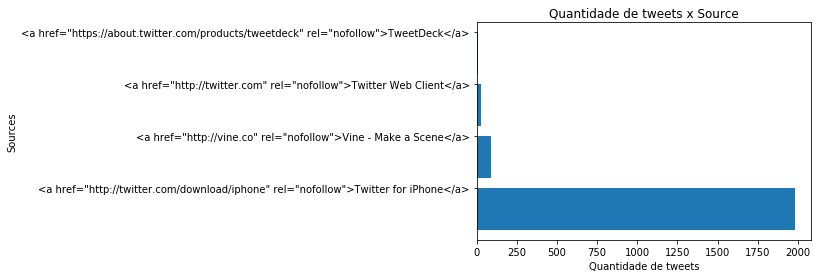

In [42]:
sources = result['source'].value_counts()
plt.barh(range(len(sources)),sources.values)
plt.yticks(np.arange(len(sources))+0.4,sources.index)
plt.xlabel('Quantidade de tweets')
plt.ylabel('Sources')
plt.title('Quantidade de tweets x Source')
plt.show()

In [43]:
result.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1985
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [44]:
y = result.groupby(result['timestamp'].map(lambda x: x.year))

In [45]:
for year, year_r in y:
    print(year)
    print(year_r)

2015
                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1441  682697186228989953                    NaN                  NaN   
1442  682662431982772225                    NaN                  NaN   
1443  682638830361513985                    NaN                  NaN   
1444  682429480204398592                    NaN                  NaN   
1445  682406705142087680                    NaN                  NaN   
1446  682393905736888321                    NaN                  NaN   
1447  682389078323662849                    NaN                  NaN   
1448  682303737705140231                    NaN                  NaN   
1449  682259524040966145                    NaN                  NaN   
1450  682242692827447297                    NaN                  NaN   
1451  682088079302213632                    NaN                  NaN   
1452  682059653698686977                    NaN                  NaN   
1453  682047327939461121                    NaN            

In [46]:
y.get_group(2015).sort_values('contagem_de_retweets',ascending=False)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary,contagem_de_retweets,contagem_de_favoritos,hashtags
1602,676219687039057920,NaN,NaN,2015-12-14 01:58:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Kenneth. He's stuck in a bubble. 10/10...,https://twitter.com/dog_rates/status/676219687...,10,10,Kenneth,,79084,33719,[]
1540,678399652199309312,NaN,NaN,2015-12-20 02:20:55,"<a href=""http://twitter.com/download/iphone"" r...",This made my day. 12/10 please enjoy https://t...,https://twitter.com/dog_rates/status/678399652...,12,10,None,,61851,30272,[]
2055,667152164079423490,NaN,NaN,2015-11-19 01:27:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,,48964,17791,[]
1506,679828447187857408,NaN,NaN,2015-12-24 00:58:27,"<a href=""http://twitter.com/download/iphone"" r...",Everybody look at this beautiful pupper 13/10 ...,https://twitter.com/dog_rates/status/679828447...,13,10,None,pupper,38784,15388,[]
1636,675354435921575936,NaN,NaN,2015-12-11 16:40:19,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Everyone needs to watch this. 13/10 https://t....,https://twitter.com/dog_rates/status/675354435...,13,10,None,,34458,18485,[]
1516,679462823135686656,NaN,NaN,2015-12-23 00:45:35,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hurley. He's the curly one. He hugs every...,https://twitter.com/dog_rates/status/679462823...,11,10,Hurley,,33999,20686,[]
1840,670842764863651840,NaN,NaN,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,None,,25516,9295,[]
1583,676821958043033607,NaN,NaN,2015-12-15 17:51:44,"<a href=""http://twitter.com/download/iphone"" r...",Finally some constructive political change in ...,https://twitter.com/dog_rates/status/676821958...,11,10,None,,24483,17022,[]
1518,679158373988876288,NaN,NaN,2015-12-22 04:35:49,"<a href=""http://twitter.com/download/iphone"" r...",This is Rubio. He has too much skin. 11/10 htt...,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,,22977,8912,[]
1945,669000397445533696,NaN,NaN,2015-11-24 03:51:38,"<a href=""http://twitter.com/download/iphone"" r...",Meet Terrance. He's being yelled at because he...,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,,21670,6733,[]


In [47]:
y.get_group(2016).sort_values('contagem_de_retweets',ascending=False)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary,contagem_de_retweets,contagem_de_favoritos,hashtags
829,744234799360020481,NaN,NaN,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,128365,77411,[]
421,807106840509214720,NaN,NaN,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,,123098,61173,[]
423,806629075125202948,NaN,NaN,2016-12-07 22:38:52,"<a href=""http://twitter.com/download/iphone"" r...","""Good afternoon class today we're going to lea...",https://twitter.com/dog_rates/status/806629075...,13,10,None,,82246,39473,[]
868,739238157791694849,NaN,NaN,2016-06-04 23:31:25,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,73373,50913,[]
475,795464331001561088,NaN,NaN,2016-11-07 03:14:10,"<a href=""http://twitter.com/download/iphone"" r...",Elder doggo does a splash. Both 13/10 incredib...,https://twitter.com/dog_rates/status/795464331...,13,10,None,doggo,54586,26917,[]
674,761672994376806400,NaN,NaN,2016-08-05 21:19:27,"<a href=""http://twitter.com/download/iphone"" r...",Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,https://twitter.com/dog_rates/status/761672994...,10,10,None,,53679,32376,[]
502,791774931465953280,NaN,NaN,2016-10-27 22:53:48,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Vine will be deeply missed. This was by far my...,https://vine.co/v/ea0OwvPTx9l,14,10,None,,49353,25113,[]
434,804026241225523202,NaN,NaN,2016-11-30 18:16:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,,48759,18297,[]
417,808344865868283904,NaN,NaN,2016-12-12 16:16:49,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Seamus. He's very bad at entering pool...,https://vine.co/v/5QWd3LZqXxd,11,10,Seamus,,46427,23407,[]
719,756288534030475264,NaN,NaN,2016-07-22 00:43:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a heartwarming scene of a single father...,https://twitter.com/dog_rates/status/756288534...,12,10,None,,45944,19398,[]


In [48]:
y.get_group(2017).sort_values('contagem_de_retweets',ascending=False)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary,contagem_de_retweets,contagem_de_favoritos,hashtags
327,822872901745569793,NaN,NaN,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,143494,49166,"[{'text': 'WomensMarch', 'indices': [62, 74]}]"
115,866450705531457537,NaN,NaN,2017-05-22 00:28:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,pupper,124476,36526,[]
60,879415818425184262,NaN,NaN,2017-06-26 19:07:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,,106035,44641,[]
352,819004803107983360,NaN,NaN,2017-01-11 02:15:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,93752,41044,[]
142,859196978902773760,NaN,NaN,2017-05-02 00:04:57,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,None,,92616,31744,[]
99,870374049280663552,NaN,NaN,2017-06-01 20:18:38,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13,10,Zoey,,83469,26889,[]
68,877736472329191424,NaN,NaN,2017-06-22 03:54:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Aja. She was just told she's a good do...,https://twitter.com/dog_rates/status/877736472...,13,10,Aja,,80123,19402,[]
34,884925521741709313,NaN,NaN,2017-07-12 00:01:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. He found a hat. Nervous about wh...,https://twitter.com/dog_rates/status/884925521...,12,10,Earl,,77639,18601,[]
131,862096992088072192,NaN,NaN,2017-05-10 00:08:34,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send perfectly...,https://twitter.com/dog_rates/status/862096992...,13,10,None,,76495,24325,[]
38,884247878851493888,NaN,NaN,2017-07-10 03:08:17,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,https://twitter.com/kaijohnson_19/status/88396...,13,10,None,,73103,20623,[]


In [49]:
y.max()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,contagem_de_retweets,contagem_de_favoritos
timestamp,,,,,,,,,,,,
2015,682697186228989953,6.757073e+17,4.196984e+09,2015-12-31 22:57:47,"<a href=""https://about.twitter.com/products/tw...",😂😂😂 10/10 for the dog and the owner https://t....,https://vine.co/v/iqMjlxULzbn,420,120,Zuzu,79084,33719
2016,814986499976527872,7.468859e+17,4.196984e+09,2016-12-31 00:08:17,"<a href=""https://about.twitter.com/products/tw...",oh h*ck 10/10 https://t.co/bC69RrW559,"https://www.gofundme.com/sams-smile,https://tw...",1776,170,Zoe,128365,77411
2017,892420643555336193,8.558181e+17,4.196984e+09,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",You'll get your package when that precious man...,"https://www.petfinder.com/petdetail/37334596,h...",84,70,Zooey,143494,49166


In [50]:
y.mean()

,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,contagem_de_retweets,contagem_de_favoritos
timestamp,,,,,,
2015,6.733559e+17,4.196984e+09,10.272189,10.266272,2539.576923,1094.718935
2016,6.983950e+17,4.196984e+09,13.378759,10.779135,7674.202068,2759.327068
2017,7.606899e+17,4.196984e+09,12.610080,10.159151,23726.790451,5846.771883


In [51]:
y.describe()

in_reply_to_status_id                                            \
                          count          mean           std           min   
timestamp                                                                   
2015                        8.0  6.733559e+17  2.764427e+15  6.678065e+17   
2016                       12.0  6.983950e+17  2.576961e+16  6.671522e+17   
2017                        3.0  7.606899e+17  9.434303e+16  6.671522e+17   

                                                                   \
                    25%           50%           75%           max   
timestamp                                                           
2015       6.716877e+17  6.747728e+17  6.751241e+17  6.757073e+17   
2016       6.820045e+17  6.917294e+17  7.097203e+17  7.468859e+17   
2017       7.131258e+17  7.590995e+17  8.074588e+17  8.558181e+17   

          in_reply_to_user_id                 ...    contagem_de_retweets  \
                        count          mean   ...                     75%   
timestamp                                     ...                           
2015                      8.0  4.196984e+09   ...                 2338.50   
2016                     12.0  4.196984e+09   ...                 8831.25   
2017                      3.0  4.196984e+09   ...                27931.00   

                    contagem_de_favoritos                                   \
                max                 count         mean          std    min   
timestamp                                                                    
2015        79084.0                 676.0  1094.718935  2616.001479   13.0   
2016       128365.0                1064.0  2759.327068  4738.570212   25.0   
2017       143494.0                 377.0  5846.771883  5875.810252  453.0   

                                              
               25%     50%      75%      max  
timestamp                                     
2015        241.75   493.5   958.25  33719.0  
2016        932.50  1536.0  2865.00  77411.0  
2017       2723.00  4192.0  6455.00  49166.0  

[3 rows x 48 columns]

In [52]:
y.hashtags.count()

timestamp
2015     676
2016    1064
2017     377
Name: hashtags, dtype: int64

In [53]:
y.get_group(2017)[y.get_group(2017).contagem_de_retweets > 23729].hashtags.count()

140

In [54]:
y.get_group(2016)[y.get_group(2016).contagem_de_retweets > 7674].hashtags.count()

339

In [55]:
y.get_group(2015)[y.get_group(2015).contagem_de_retweets > 2539].hashtags.count()

153

In [56]:
y.get_group(2015).sort_values('timestamp')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary,contagem_de_retweets,contagem_de_favoritos,hashtags
2116,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,,2560,518,[]
2115,666029285002620928,NaN,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,,130,47,[]
2114,666033412701032449,NaN,NaN,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,,125,44,[]
2113,666044226329800704,NaN,NaN,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,,298,141,[]
2112,666049248165822465,NaN,NaN,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,,109,40,[]
2111,666050758794694657,NaN,NaN,2015-11-16 00:30:50,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10,None,,132,58,[]
2110,666051853826850816,NaN,NaN,2015-11-16 00:35:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,None,,1229,854,[]
2109,666055525042405380,NaN,NaN,2015-11-16 00:49:46,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10,10,None,,437,257,[]
2108,666057090499244032,NaN,NaN,2015-11-16 00:55:59,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10,None,,298,141,[]
2107,666058600524156928,NaN,NaN,2015-11-16 01:01:59,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10,None,,112,57,[]


In [57]:
y.source.value_counts()

timestamp  source                                                                             
2015       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     639
           <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      20
           <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                         13
           <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      4
2016       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     974
           <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                         78
           <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      7
           <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       5
2017       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone